<a href="../01_LTI/_index.ipynb">&larr; LTI-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>

# IIR-Filter in Python

Dieses Notebook zeigt wie man in Python mit IIR Filtern umgeht, deren Impulsantwort unendlich ist (daher der Name "Infinite Impulse Response" ...) und die daher nicht als Zahlenfolge abgelegt werden kann.

- Anlegen von Subplots
- Definition eines IIR-Filters über seine Koeffizienten
- Impulsantwort impz(), linear und logarithmisch
- filtere (= falte) Eingangssequenz mit Impulsantwort des IIR-Filters
  (unendlich ausgedehnt!) mit `scipy.signal.lfilter()`
- interpoliere Sequenz mit `scipy.interpolate.interp1`


In [1]:
import numpy as np
from numpy import cos, pi
import scipy.signal as sig
import scipy.interpolate as intp

%matplotlib inline
import matplotlib.pyplot as plt
size = {"figsize":(10,6)} # Plotgröße in Inch

import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import dsp_fpga_lib as dsp

In der folgenden Zelle berechnen wir die Impulsantwort des Filters und stellen sie linear und logarithmisch dar.

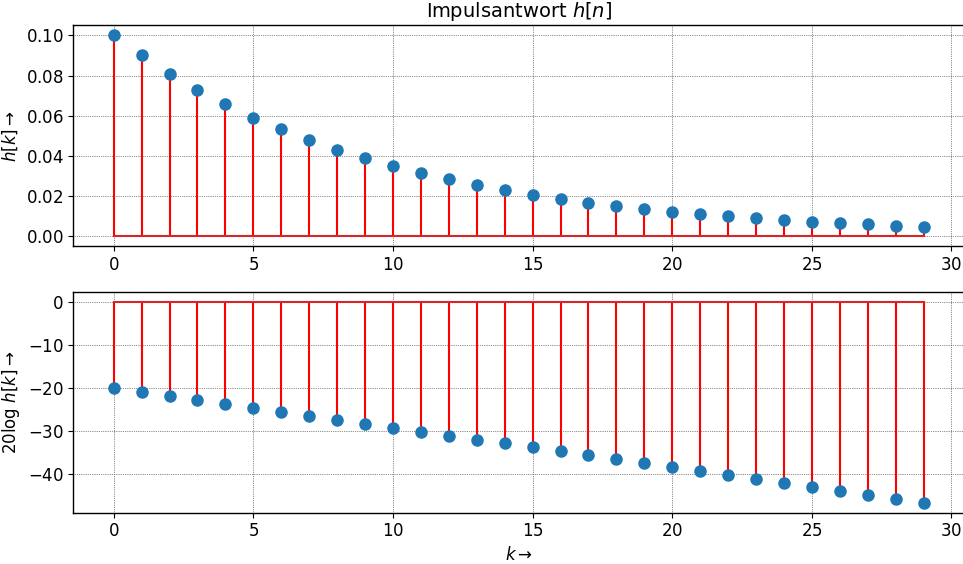

In [2]:
f1 = 50; Ts = 5e-3 
n = np.arange(0, 50) # sample n
t = np.arange(0, 49., 0.1) # feiner aufgelöst (pseudo)
b = [0.1, 0]; a = [1, -0.9] # filter coefficients
# ->   H(z) = (0.1 z + 0) / (z - 0.9)
[h, k] = dsp.impz(b, a, N = 30) # -> h[k]
fig, (ax1, ax2) = plt.subplots(2, **size)
ax1.stem(k, h, 'r', use_line_collection=True) # x[n], red stems
ax1.set_ylabel(r'$h[k] \rightarrow$')
ax1.set_title(r'Impulsantwort $h[n]$')
# ---
ax2.stem(k, 20*np.log10(np.abs(h)), 'r', use_line_collection=True) 
ax2.set_xlabel(r'$k \rightarrow$')
ax2.set_ylabel(r'$20 \log\, h[k] \rightarrow$');
fig.set_tight_layout(True)

Aufgrund der unendlichen Impulsantwort kann man die Impulsantwort nicht mit Hilfe der Faltung berechnen, man nimmt `scipy.signal.lfilter(b,a,x)`. Der folgende Plot zeigt, wie der Ausgang des Filters den Mittelwert 1.5 annimmt und noch eine geringe Restwelligkeit zu sehen ist. Die Restwelligkeit ist im interpolierten Plot besser zu erkennen.

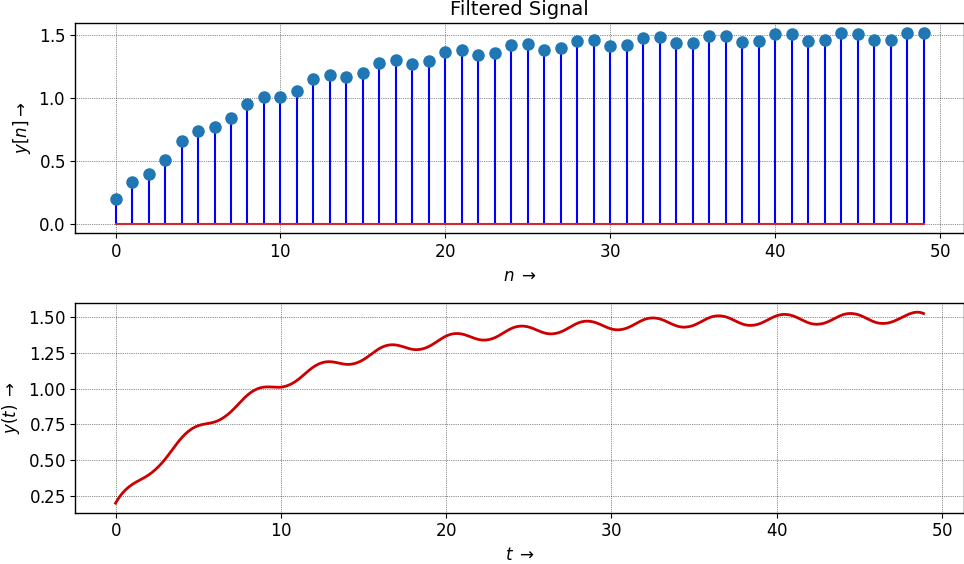

In [3]:
xn = 1.5 + 0.5*cos(2.0*pi*f1*n*Ts) # x[n]
yn = sig.lfilter(b,a,xn) # filter xn with h
fig2, (ax1, ax2) = plt.subplots(2, **size)
ax1.stem(n, yn, 'b', use_line_collection=True) # plot y[n]
ax1.set_xlabel(r'$n \;\rightarrow$'); ax1.grid(True)
ax1.set_ylabel(r'$y[n] \rightarrow$')
ax1.set_title('Filtered Signal')
f = intp.interp1d(n, yn, kind = 'cubic')
yt = f(t) # y(t), interpolated
ax2.plot(t, yt, color='#cc0000', linewidth=2)
ax2.set_ylabel(r'$y(t) \; \rightarrow$')
ax2.set_xlabel(r'$t \;\rightarrow$'); ax2.grid(True)
fig2.set_tight_layout(True)

### Hinweise
- Die Label sind im Mathemodus (zwischen `$ ... $` ) mit $\LaTeX$ Syntax beschriftet. Der String muss mit vorangestelltem "r" als "raw" deklariert werden, ansonsten wird in TeX-Keywords, die z.B. mit `\t...`, `\n...` beginnen ein Tabulator bzw. ein LineFeed gelesen. Im Mathemodus werden Leerzeichen geschluckt, `\;` erzwingt eins.
- Die Interpolation von Signalen ist in Python anders implementiert als in Matlab: In Python definiert man zunächst eine Funktion auf Basis der vorhandenen Stützpunkte und des gewählten Interpolationsverfahren und berechnet damit die Funktionswerte für die neuen unabhängigen Werte.

### Aufgaben
- Finden Sie heraus, wie die Funktion `impz()` funktioniert, sie ist in der Bibliothek `dsp_fpga_lib` definiert.
- Variieren Sie die Frequenz des Eingangssignals und beobachten Sie, wie das Ausgangssignal reagiert.
- Ändern Sie die Koeffienten des IIR-Filters - wann wird das Filter instabil und wie sehen Sie das in der Simulation?

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp 

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.